# Exploratory Analysis and Machine Learning on Physical Activity Monitoring Dataset

- Name: Jonathan S D Benda Jr
- ID: C00290862   
- Course: Data Analytics and Algorithms (MSc Data Science)
- Submission Date: May 10,, 2023

### Table of Content
- 1.0 Introduction
    - 1.1 Project Objectives
    - 1.2 Importing all the necessary python modules
    

- 2.0 Data import, Cleaning, and Pre-processing
    - 2.1 Data Loading and wrangling
    - 2.2 Defining the Data Cleaning Function
    - 2.3 Calculating the Resultant Acceleration and the Resultant Angular Velocity

- 3.0 Exploratory Data Analysis And Visualizations
    - 3.1 Balance Analysis
    - 3.2 Splitting the dataset into training and testing sets
    - 3.3 Performing Summary Statistics
    - 3.4 Heart Rate Anlysis
    - 3.5 Tempature Analysis
    - 3.6 Acceleration analysis
    - 3.7 Angular velocity analysis
    - 3.8 Sensor Analysis
    - 3.8.1 Correleation Analysis for the Sensor data

- 4.0 Hypothesis Testing
    - 4.1 Hypothesis 1 
    - 4.2 Hypothesis 2
    - 4.3 Hypothesis 3

- 5.0 Developing Models
    - 5.1 Importing all the required modules and libraries
    - 5.2 Data preparation and function defination for model
    - 5.3 Dimensionality reduction using Principal Component Analysis(PCA)
    - 5.4 SVC model using PCA
    - 5.5 SVC model without using PCA
    - 5.6 Comparing Random Forest vs Logistic Regression model
        - 5.6.1 Random Forest Classifier Model
        - 5.6.2 Logistic Regression Model
    - 5.7 Applying Random Forest Classifier to the dataset
        - 5.7.1 Applying Random Forest Classifier without gyroscope data
        - 5.7.2 Applying Random Forest Classifier without temperature sensor data
    - 5.8 Location of sensors
        - 5.8.1 Applying Random Forest Classifier to the dataset, for hand-held sensor
        - 5.8.2 Applying Random Forest Classifier to the dataset, for ankle-held sensor
        - 5.8.3 Applying Random Forest Classifier to the dataset, for chest-held sensor

- 6.0 Conclusion

- 7.0 References

## 1.0 Introduction
Physical activity is essential for good health and well-being. However, measuring and analysing physical activity can be difficult due to the variety of actions and physiological responses involved. In this paper, we will look at a dataset that uses wearable sensors and gadgets to collect data on various physical activities undertaken by humans. The dataset is called the Physical Activity Monitoring dataset, and it comprises data from 18 various physical activities (such as walking, cycling, playing football, etc) conducted by 9 people while wearing three inertial measurement units (IMU) and a heart rate monitor. The data is saved in separate text files for each participant, with each row representing one reading and 54 characteristics (including timestamp, activity ID, heart rate, and IMU sensory data). 

There are 18 physical activities, but only 12 of them are protocol activities, which have a set order and length. In our investigation, we will only look at these 12 protocol activities, and our ultimate goal will be to create an appropriate machine learning model to identify which sort of physical activity a person is undertaking based on sensor data. This may be used to monitor health status, provide feedback and recommendations, or discover abnormalities and crises, among other things.

### 1.1 Project Objectives
The objective of this research is to provide insights from the datasets produced by wearable hardware devices and/or software. The created hardware and/or software can determine the amount as well as the type of physical activity an individual (or subject) performs in making use of start/end timings and heart rates.

Some major outcomes of the project are:
1. Perform a thorough exploratory data analysis by cleaning, pre-processing, and analysing/visualizing the data.
2. Perform summary statistics to get quick insight of the data at hand.
3. To develop and test more than one hypothesis for a relationship between a pair of attributes.
4. To develop and test more than one machine learning model which uses multiple attributes to make predictions.
5. To Evaluate the accuracy of these models develop, along with it's precision and F1 scores.

### 1.2 Importing all the necessary python modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler

from pylab import rcParams
#rcParams['figure.figsize'] = 12,6

import scipy
from scipy.stats import pearsonr
from scipy.stats import spearmanr

%matplotlib inline
# plt.style.use('seaborn-whitegrid')
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

# 2.0 Data Import, Cleaning, and Pre-processing

### 2.1 Data Loading and wrangling

In [9]:
# Loading data
allFiles_list = ['data/subject101.dat',
                 'data/subject102.dat',
                 'data/subject103.dat',
                 'data/subject104.dat',
                 'data/subject105.dat',
                 'data/subject106.dat',
                 'data/subject107.dat',
                 'data/subject108.dat',
                 'data/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

# An activity id dictonary is created based on the dataset
activityID_dict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }


# Naming columns
col_1to3 = ["timestamp", "activityID","heartRate"]

IMU_Hand = ['handTemperature', 
           'handAcceleration16_1', 'handAcceleration16_2', 'handAcceleration16_3', 
           'handAcceleration06_1', 'handAcceleration06_2', 'handAcceleration06_3', 
           'handGyroscope1', 'handGyroscope2', 'handGyroscope3', 
           'handMagnetometer1', 'handMagnetometer2', 'handMagnetometer3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMU_Chest = ['chestTemperature', 
           'chestAcceleration16_1', 'chestAcceleration16_2', 'chestAcceleration16_3', 
           'chestAcceleration06_1', 'chestAcceleration06_2', 'chestAcceleration06_3', 
           'chestGyroscope1', 'chestGyroscope2', 'chestGyroscope3', 
           'chestMagnetometer1', 'chestMagnetometer2', 'chestMagnetometer3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMU_Ankle = ['ankleTemperature', 
           'ankleAcceleration16_1', 'ankleAcceleration16_2', 'ankleAcceleration16_3', 
           'ankleAcceleration06_1', 'ankleAcceleration06_2', 'ankleAcceleration06_3', 
           'ankleGyroscope1', 'ankleGyroscope2', 'ankleGyroscope3', 
           'ankleMagnetometer1', 'ankleMagnetometer2', 'ankleMagnetometer3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = col_1to3 + IMU_Hand + IMU_Chest + IMU_Ankle

In [10]:
print(columns)

['timestamp', 'activityID', 'heartRate', 'handTemperature', 'handAcceleration16_1', 'handAcceleration16_2', 'handAcceleration16_3', 'handAcceleration06_1', 'handAcceleration06_2', 'handAcceleration06_3', 'handGyroscope1', 'handGyroscope2', 'handGyroscope3', 'handMagnetometer1', 'handMagnetometer2', 'handMagnetometer3', 'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4', 'chestTemperature', 'chestAcceleration16_1', 'chestAcceleration16_2', 'chestAcceleration16_3', 'chestAcceleration06_1', 'chestAcceleration06_2', 'chestAcceleration06_3', 'chestGyroscope1', 'chestGyroscope2', 'chestGyroscope3', 'chestMagnetometer1', 'chestMagnetometer2', 'chestMagnetometer3', 'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4', 'ankleTemperature', 'ankleAcceleration16_1', 'ankleAcceleration16_2', 'ankleAcceleration16_3', 'ankleAcceleration06_1', 'ankleAcceleration06_2', 'ankleAcceleration06_3', 'ankleGyroscope1', 'ankleGyroscope2', 'ankleGyroscop

In [11]:
raw_data = pd.DataFrame()
for file in allFiles_list:
    subject = pd.read_table(file, header=None, sep='\s+')
    subject.columns = columns
    subject['subject_id'] = int(file[-5])
    raw_data = pd.concat([raw_data, subject], ignore_index=True, axis=0)

raw_data.reset_index(drop=True, inplace=True)

pd.set_option('display.max_columns',None)  #to display all columns
raw_data

,timestamp,activityID,heartRate,handTemperature,handAcceleration16_1,handAcceleration16_2,handAcceleration16_3,handAcceleration06_1,handAcceleration06_2,handAcceleration06_3,handGyroscope1,handGyroscope2,handGyroscope3,handMagnetometer1,handMagnetometer2,handMagnetometer3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcceleration16_1,chestAcceleration16_2,chestAcceleration16_3,chestAcceleration06_1,chestAcceleration06_2,chestAcceleration06_3,chestGyroscope1,chestGyroscope2,chestGyroscope3,chestMagnetometer1,chestMagnetometer2,chestMagnetometer3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcceleration16_1,ankleAcceleration16_2,ankleAcceleration16_3,ankleAcceleration06_1,ankleAcceleration06_2,ankleAcceleration06_3,ankleGyroscope1,ankleGyroscope2,ankleGyroscope3,ankleMagnetometer1,ankleMagnetometer2,ankleMagnetometer3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.3878,-34.04430,0.558630,-0.593878,0.292228,0.499844,32.3750,2.926640,10.21030,-0.983335,3.125630,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.599100,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5000,9.38737,-0.565040,-3.273700,9.09401,-0.228554,-2.687700,-0.037788,-0.0626

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              float64
 1   activityID             int64  
 2   heartRate              float64
 3   handTemperature        float64
 4   handAcceleration16_1   float64
 5   handAcceleration16_2   float64
 6   handAcceleration16_3   float64
 7   handAcceleration06_1   float64
 8   handAcceleration06_2   float64
 9   handAcceleration06_3   float64
 10  handGyroscope1         float64
 11  handGyroscope2         float64
 12  handGyroscope3         float64
 13  handMagnetometer1      float64
 14  handMagnetometer2      float64
 15  handMagnetometer3      float64
 16  handOrientation1       float64
 17  handOrientation2       float64
 18  handOrientation3       float64
 19  handOrientation4       float64
 20  chestTemperature       float64
 21  chestAcceleration16_1  float64
 22  chestAcceleration1

Visualizing missing values in the dataset

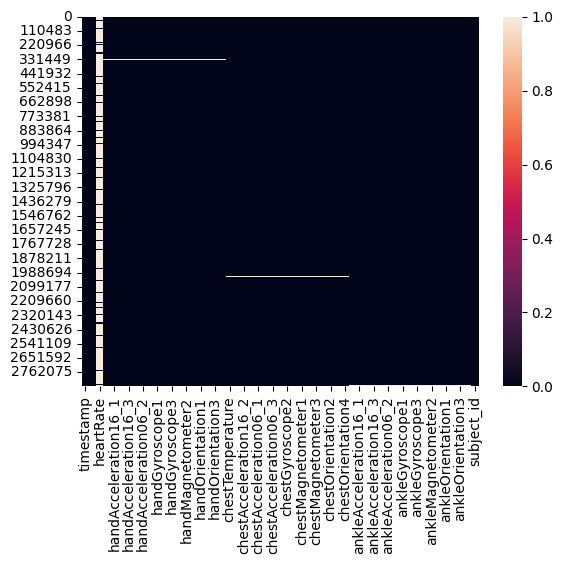

In [13]:
sns.heatmap(raw_data.isnull())
plt.show()

Checking the null percentage for each column

In [15]:
round(raw_data.isnull().sum().sort_values(ascending=False)/len(raw_data) * 100,2)

heartRate                90.87
handOrientation3          0.46
handGyroscope1            0.46
handOrientation4          0.46
handOrientation2          0.46
handOrientation1          0.46
handMagnetometer3         0.46
handMagnetometer2         0.46
handGyroscope3            0.46
handGyroscope2            0.46
handMagnetometer1         0.46
handAcceleration06_3      0.46
handAcceleration06_2      0.46
handAcceleration06_1      0.46
handAcceleration16_3      0.46
handAcceleration16_2      0.46
handAcceleration16_1      0.46
handTemperature           0.46
ankleOrientation4         0.41
ankleAcceleration16_1     0.41
ankleAcceleration16_2     0.41
ankleAcceleration16_3     0.41
ankleAcceleration06_1     0.41
ankleAcceleration06_2     0.41
ankleAcceleration06_3     0.41
ankleGyroscope1           0.41
ankleOrientation2         0.41
ankleOrientation3         0.41
ankleGyroscope2           0.41
ankleGyroscope3           0.41
ankleMagnetometer1        0.41
ankleMagnetometer2        0.41
ankleMag


There are varying percentages of null or missing values in all columns other than three (timestamp, activityID, and subject_id). The heart rate (HR) column, however, contained the highest percentage (more than 90%) of null values. Since data is provided every 0.01s (due to the IMUs' 100Hz sampling frequency) and the HR monitor's sampling frequency was only about 9Hz, as stated in the $readme file$, the missing HR values were likewise denoted with NaN in the data files.

The two most demanding of the 12 activities listed are running and rope jumping, and 9Hz is still sufficient to capture all the variations in IMU data (acceleration oscillations and angular velocity oscillations), as the fastest runners and skippers in the world use less than 4 hand and ankle oscillations per second and less than 7 oscillations per second, respectively.

Therefore, removing this HR-related missing data would not have a negative effect on our analysis. For every potential number of 10, removing the nine missing values reduces the timestamp to approximately 0.1 seconds instead of 0.01 seconds.

As stated in the $readme file$, data marked with activityID=0 should also be disregarded. The majority of this content focuses on transitional tasks, such going from one area to the location of the following activity or waiting for certain equipment to be readied. Additionally, during these transitory activities, multiple sections of one subject's recording were combined (observable by some "jumping" in the heart rate data in the case that data collection was discontinued for whatever reason).

According to instructions in the $readme file$, we would exclude accelerometer data with a scale of less than 6 g since it can occasionally get saturated as a result of heavy impacts brought on by particular actions (such as running). Instead, we may utilise accelerometer data with a scale of 16 g. Additionally, as the orientation data cannot be used to forecast the activities, it is being removed.

The magnetic field measurement solely depends on the environment in which the activity is being conducted (the Earth's magnetic field), not the activity itself, because none of the listed activities interfere with the magnetic field. Consequently, the magnetic field measurement is not helpful in achieving our objective of merely identifying the activity the individual is engaged in.

### 2.2 Defining the Data Cleaning Function

Note: In the following defined function for cleaning and data treatment, interpolation would be done only after the removal of data marked with activityID, 0.

In [16]:

def dataCleaning(raw_data):
    #Dropping NaN data from heart rate column
    raw_data = raw_data.dropna(subset = ['heartRate'])
    
    #Dropping data from accelerometer with scale ±6g
    raw_data = raw_data.drop(['handAcceleration06_1', 'handAcceleration06_2', 'handAcceleration06_3',
                           'chestAcceleration06_1', 'chestAcceleration06_2', 'chestAcceleration06_3',
                           'ankleAcceleration06_1', 'ankleAcceleration06_2', 'ankleAcceleration06_3'],axis = 1)
    
    #Dropping orientation columns as they are not needed
    raw_data = raw_data.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                            'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                            'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],axis = 1)
    
    #Dropping data marked with activityID=0 
    raw_data = raw_data.drop(raw_data[raw_data.activityID == 0].index)
    
    #Replacing all non-numeric values with NaN in our dataset
    for col in raw_data.filter(like='20').columns:
        raw_data[col] = pd.to_numeric(df[col], errors='coerce')
        
    #Dropping magneticfield measurements
    raw_data = raw_data.drop(['handMagnetometer1', 'handMagnetometer2', 'handMagnetometer3',
                            'chestMagnetometer1', 'chestMagnetometer2', 'chestMagnetometer3',
                            'ankleMagnetometer1', 'ankleMagnetometer2', 'ankleMagnetometer3',],axis = 1)
    
    #Replacing NaN value by interpolation
    raw_data = raw_data.interpolate(limit_direction = 'both')
    return raw_data

Applying the newly defined function (dataCleaning) on our raw data (raw_data)

In [18]:
dfCleaned = dataCleaning(raw_data) 
dfCleaned.head()

,timestamp,activityID,heartRate,handTemperature,handAcceleration16_1,handAcceleration16_2,handAcceleration16_3,handGyroscope1,handGyroscope2,handGyroscope3,chestTemperature,chestAcceleration16_1,chestAcceleration16_2,chestAcceleration16_3,chestGyroscope1,chestGyroscope2,chestGyroscope3,ankleTemperature,ankleAcceleration16_1,ankleAcceleration16_2,ankleAcceleration16_3,ankleGyroscope1,ankleGyroscope2,ankleGyroscope3,subject_id
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,-0.062964,32.1875,0.125825,9.72560,-1.61331,-0.029411,-0.037321,-0.033805,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,0.005246,32.1875,0.199567,9.64954,-1.68917,-0.009560,-0.055878,-0.044714,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,-0.038533,32.1875,0.279626,9.80069,-1.57205,-0.067753,0.020297,-0.012148,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,-0.020670,32.1875,0.428255,9.64882,-1.68503,0.007856,0.001881,-0.058687,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,1


In [19]:
dfCleaned.shape

(177408, 25)

NB: The decline in number of rows from 2872533  to 177408 is primarily due to dropped data marked with activity ID '0', dropped orientation columns and dropped magnetic field measurements.


Re-visualizing our dataset to see the missing values

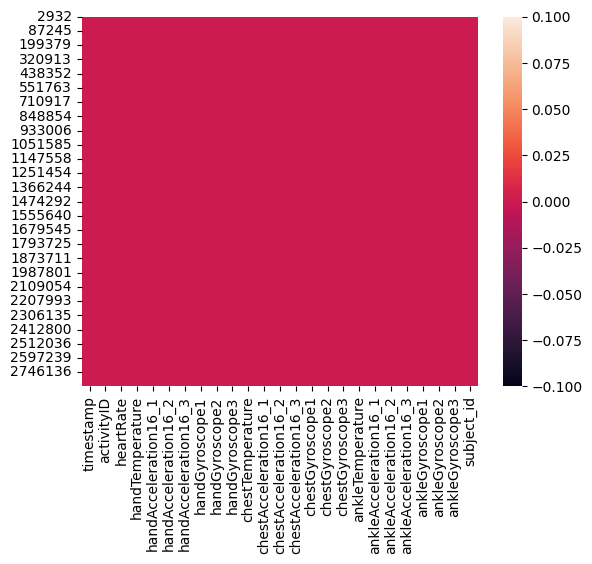

In [20]:
sns.heatmap(dfCleaned.isnull())
plt.show()

Based on the plot from the heat map, we can confidently say that there is no null or missing values

Also, verifying to make sure that there is no null values

In [21]:
dfCleaned.isnull().sum().sort_values(ascending=False)

timestamp                0
chestAcceleration16_3    0
ankleGyroscope3          0
ankleGyroscope2          0
ankleGyroscope1          0
ankleAcceleration16_3    0
ankleAcceleration16_2    0
ankleAcceleration16_1    0
ankleTemperature         0
chestGyroscope3          0
chestGyroscope2          0
chestGyroscope1          0
chestAcceleration16_2    0
activityID               0
chestAcceleration16_1    0
chestTemperature         0
handGyroscope3           0
handGyroscope2           0
handGyroscope1           0
handAcceleration16_3     0
handAcceleration16_2     0
handAcceleration16_1     0
handTemperature          0
heartRate                0
subject_id               0
dtype: int64

### 2.3 Calculating the Resultant Acceleration and the Resultant Angular Velocity

Furthermore, we can combine acceleration and gyroscope measurements by finding the resultant acceleration and resultant angular velocity (gyroscope data) for hand, chest and ankle separately. The resultant values calculated will be captured in new columns, whereas, the individual acceleration and the angular velocity measurements dropped. 

Resultant acceleration, $a_{(res)} = \sqrt {a_x^2 \, +\, a_y^2 \,+\, a_z^2}$

Resultant angular velocity, $\omega_{(res)} = \sqrt {\omega_x^2 \, +\, \omega_y^2 \,+\, \omega_z^2}$

Calculating the resultant acceleration, and angular velocity for hand, chest and ankle described above...

In [33]:
dfCleaned['handAcceleration'] = ((dfCleaned.handAcceleration16_1**2)+(dfCleaned.handAcceleration16_2**2)+(dfCleaned.handAcceleration16_3**2))**0.5
dfCleaned['chestAcceleration'] = ((dfCleaned.chestAcceleration16_1**2)+(dfCleaned.chestAcceleration16_2**2)+(dfCleaned.chestAcceleration16_3**2))**0.5
dfCleaned['ankleAcceleration'] = ((dfCleaned.ankleAcceleration16_1**2)+(dfCleaned.ankleAcceleration16_2**2)+(dfCleaned.ankleAcceleration16_3**2))**0.5
dfCleaned['handGyroscope'] = ((dfCleaned.handGyroscope1**2)+(dfCleaned.handGyroscope2**2)+(dfCleaned.handGyroscope3**2))**0.5
dfCleaned['chestGyroscope'] = ((dfCleaned.chestGyroscope1**2)+(dfCleaned.chestGyroscope2**2)+(dfCleaned.chestGyroscope3**2))**0.5
dfCleaned['ankleGyroscope'] = ((dfCleaned.ankleGyroscope1**2)+(dfCleaned.ankleGyroscope2**2)+(dfCleaned.ankleGyroscope3**2))**0.5

Dropping all of the individual acceleration,angularvelocity and magneticfield measurements and

In [34]:
dfCleaned = dfCleaned.drop(['handAcceleration16_1','handAcceleration16_2','handAcceleration16_3',
           'chestAcceleration16_1','chestAcceleration16_2','chestAcceleration16_3',
           'ankleAcceleration16_1','ankleAcceleration16_2','ankleAcceleration16_3',
           'handGyroscope1','handGyroscope2','handGyroscope3',
           'chestGyroscope1','chestGyroscope2','chestGyroscope3',
           'ankleGyroscope1','ankleGyroscope2','ankleGyroscope3'], axis=1)

In [35]:
dfCleaned

,timestamp,activityID,heartRate,handTemperature,chestTemperature,ankleTemperature,subject_id,handAcceleration,chestAcceleration,ankleAcceleration,handGyroscope,chestGyroscope,ankleGyroscope
2932,37.70,1,100.0,30.375,32.1875,30.75,1,9.751993,9.875840,9.956473,0.072467,0.041521,0.049304
2943,37.81,1,100.0,30.375,32.1875,30.75,1,9.583806,9.859305,9.946165,0.435808,0.058315,0.024230
2954,37.92,1,100.0,30.375,32.1875,30.75,1,9.639631,9.798303,9.911287,0.081883,0.072202,0.022479
2965,38.03,1,100.0,30.375,32.1875,30.75,1,10.045489,9.929907,9.760667,0.374651,0.071764,0.016725
2976,38.14,1,101.0,30.375,32.1875,30.75,1,9.963993,9.804206,9.888575,0.378423,0.059240,0.067042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,32.3750,31.50,9,10.876780,9.884364,10.063054,0.157022,0.100384,0.037724
2871986,94.77,24,162.0,25.125,32.3750,31.50,9,10.341491,9.895226,9.792079,0.458881,0.162803,0.010443
2871997,94.88,24,162.0,25.125,32.3750,31.50,9,10.021582,9.915689,9.809462,0.415535,0.310067,0.051387
2872007,94.98,24,162.0,25.125,32.3750,31.50,9,9.932805,10.178812,9.947890,0.388336,0.322284,0.042514


## 3.0 Exploratory Data Analysis And Visualizations
Examining the data, to see if we can find any interesting statistics and observations. To achieve this, the data is further split into test and train. On the train data, we will perform EDA, and on the test data, we will perform hypothesis testing.

### 3.1 Balance Analysis
Before you split your data into a training set and a testing set, it is important to assess the balance of your dataset. If your dataset is imbalanced, it can affect the performance of your model and the validity of your results. Hence, this analysis is necessary to check for each subject if there are equal number of samples

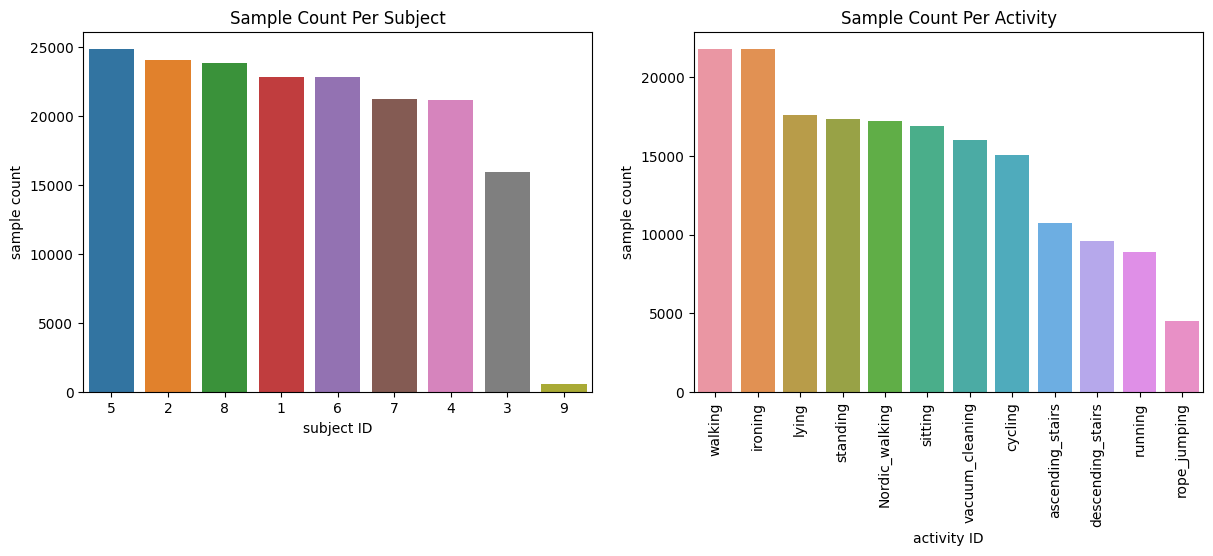

In [36]:
plt.subplots_adjust(1,0,2.75,0.75)

plt.subplot(121)
descend = dfCleaned.groupby('subject_id').size().sort_values().index[::-1]
sns.countplot(x='subject_id', data=dfCleaned, order=descend)
plt.title("Sample Count Per Subject")
plt.xlabel('subject ID')
plt.ylabel('sample count')

plt.subplot(122)
descend = dfCleaned.groupby('activityID').size().sort_values().index[::-1]
a =[activityID_dict[i] for i in descend]
s = sns.countplot(x='activityID', data=dfCleaned, order=descend)
s.set_xticklabels(a, rotation=90)
plt.title("Sample Count Per Activity")
plt.xlabel('activity ID')
plt.ylabel('sample count')

plt.show()

We can see from the chart above that the data isn't balanced:
* Subject 9 has less samples then all others subjects, while subject 5 had the most samples.
* On the other hand, Rope_jumping (activity 24) has the least number of samples than other activities, and walking recorded the most samples.

The main drawback to that, though, is that the outcome could be skewed if the researcher places more of attention on one category.

### 3.2 Splitting the dataset into training and testing sets

A dataset is split into different training and test sets through the process of data splitting. A machine learning model is trained using a training set, and its performance on test data is assessed using the test set. There are other ways to divide data, but in this instance, we're using stratified sampling, which is helpful when the classes are unbalanced.

The split percentage that will be employed is 80% for the train set and 20% for the test set, which is the most typical split used.

In [37]:
dfTrain = dfCleaned.sample(frac=0.8, random_state=1)
dfTest = dfCleaned.drop(dfTrain.index)

In [38]:
dfTrain

,timestamp,activityID,heartRate,handTemperature,chestTemperature,ankleTemperature,subject_id,handAcceleration,chestAcceleration,ankleAcceleration,handGyroscope,chestGyroscope,ankleGyroscope
68817,696.55,3,98.0,33.0000,34.6250,33.3750,1,9.849247,9.701193,9.831735,0.055663,0.019209,0.035965
2773370,3179.34,7,117.0,30.6875,33.8125,31.8125,8,3.768636,4.899456,9.293140,0.755839,0.469348,1.119186
2622702,1672.66,12,98.0,34.3750,38.0625,34.3125,8,15.689417,14.417261,8.611949,3.647789,1.885233,4.855775
331735,3325.73,5,173.0,30.3750,33.6875,33.0000,1,11.102513,9.566765,23.534973,5.211004,3.488922,2.143105
1747730,3424.74,5,161.0,33.8125,36.4375,34.0625,5,10.947063,0.632507,16.168164,0.950638,0.724282,2.931711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880404,1003.84,17,94.0,33.9375,36.3125,35.0000,6,6.488687,10.221807,9.936002,3.038962,0.504451,0.257418
1756819,3515.63,5,168.0,33.8125,36.4375,34.0625,5,18.947467,17.636388,7.127737,2.239039,2.468520,7.658168
91282,921.20,17,95.0,33.2500,35.0625,33.8750,1,8.925970,10.072270,9.888537,1.999493,0.358600,0.116877
2547441,920.05,17,86.0,34.6875,37.8125,34.6250,8,8.095979,9.556632,10.100330,0.997330,1.278140,0.623104


### 3.3 Performing Summary Statistics
To quickly summarise a large amount of data and spot patterns or trends, summary statistics are often utilised. They may be utilised to compare several datasets or collections of data.

A summary stats of the training dataset.

In [39]:
dfTrain.describe()

,timestamp,activityID,heartRate,handTemperature,chestTemperature,ankleTemperature,subject_id,handAcceleration,chestAcceleration,ankleAcceleration,handGyroscope,chestGyroscope,ankleGyroscope
count,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000
mean,1705.094311,8.078034,107.490044,32.749716,36.178089,33.711993,4.565569,10.991668,10.200550,12.404378,1.515040,0.520830,1.429680
std,1093.879660,6.175274,26.990819,1.794006,1.494018,1.091315,2.335595,5.732630,3.867411,7.766630,1.715356,0.593134,1.913037
min,31.220000,1.000000,57.000000,24.875000,31.937500,30.000000,1.000000,0.278204,0.220936,0.326540,0.001588,0.001402,0.000579
25%,742.772500,3.000000,86.000000,31.687500,35.187500,33.000000,2.000000,9.444194,9.471611,9.859592,0.168618,0.095711,0.058374
50%,1479.530000,6.000000,105.000000,33.125000,36.437500,34.062500,5.000000,9.800118,9.829702,10.045199,0.986604,0.368505,0.537875
75%,2665.130000,13.000000,124.000000,34.062500,37.437500,34.500000,7.000000,11.276136,10.402262,11.730005,2.240869,0.706778,2.140915
max,4245.650000,24.000000,202.000000,35.500000,38.562500,35.437500,9.000000,178.922859,127.143562,200.641542,19.163110,15.775153,14.580009


Based on the descriptive stats above for the train data, Heart Rate ranged between $57/min$ to $202/min$ with a mean value of $\approx 107/min$.

Also, temperature measurements for hand, chest and ankle ranges between $24.9 ^\circ$ to about $38.6 ^\circ $, with the maximum value recorded for chest temperature and minimum observed for hand temperature.

Also, mean acceleration measurements for hand, chest and ankle ranges between $10.2 \, m^2/sec$ to about $12.5 \, m^2/sec$, with the maximum value recorded for ankle acceleration and minimum observed for chest acceleration.

Also, mean angular velocity measurements for hand, chest and ankle ranges between $0.54 \, rad/sec$ to about $1.56 \, rad/sec$, with the maximum value recorded for hand and minimum observed for chest.

### 3.4 Heart Rate Analysis 

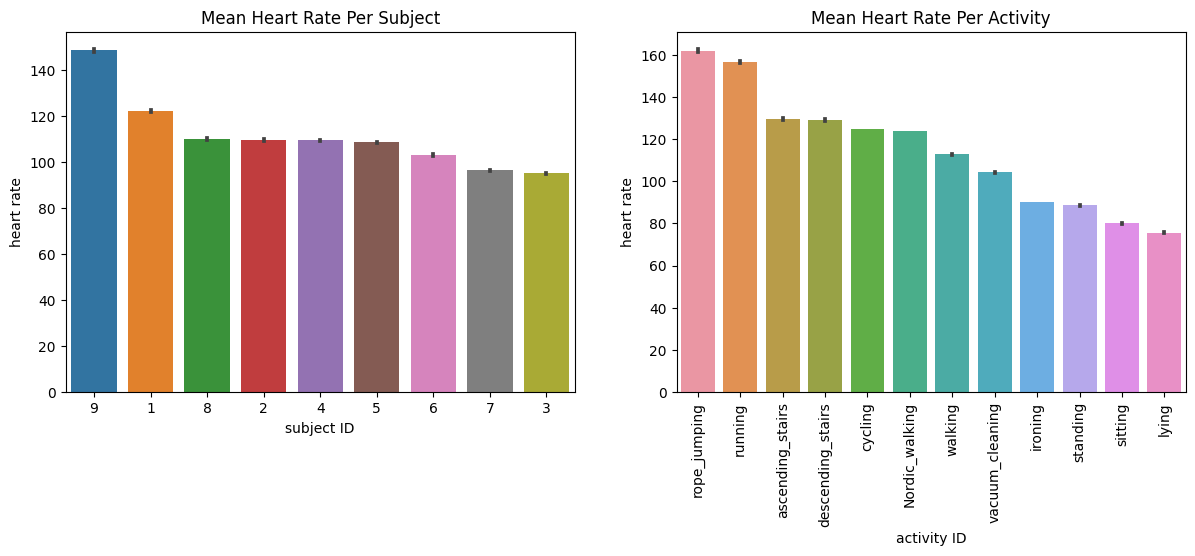

In [40]:
plt.subplots_adjust(1,0,2.75,0.75)

plt.subplot(121)
dfTrain_HR = dfTrain['heartRate'].groupby(dfTrain["subject_id"]).mean().sort_values().index[::-1]
sns.barplot(x='subject_id', data=dfCleaned, y="heartRate", order=dfTrain_HR)
plt.title("Mean Heart Rate Per Subject")
plt.xlabel('subject ID')
plt.ylabel('heart rate')

plt.subplot(122)
dfTrain_HR = dfTrain['heartRate'].groupby(dfTrain["activityID"]).mean().sort_values().index[::-1]
a =[activityID_dict[i] for i in dfTrain_HR]
s = sns.barplot(x='activityID', data=dfTrain, y="heartRate", order=dfTrain_HR)
s.set_xticklabels(a, rotation=90)
plt.title("Mean Heart Rate Per Activity")
plt.xlabel('activity ID')
plt.ylabel('heart rate')

plt.show()

As seen from the plots above, Subject 9 has the greatest heart rate of all the other individual subjects. For physically easy occupations like ironing, standing, sitting, and reclining, the average heart rate is on the lower end of the spectrum and is rather close to the normal heart rate of $72 bpm$. The average heart rate for activities that are merely moderately strenuous, such cycling, Nordic walking, and ascending and descending stairs, is higher than $120 bpm$. The typical heart rate is above $150 bpm$ when engaging in strenuous physical activity, such as jogging and rope jumping.

### 3.5 Temperature Analysis
Temperature analysis  is known as the process of monitoring and examining an object's or system's temperature in order to comprehend and characterise its behaviour. Temperature analysis may be used to identify trends and patterns, improve workflows, resolve issues, and predict future behaviour.

In [41]:
dfAll_Temperature = dfTrain[['handTemperature','chestTemperature','ankleTemperature']].groupby(dfTrain['activityID']) 
dfAll_Temperature_summaryStat = dfAll_Temperature.describe()

# To change the index to the real index
dfAll_Temperature_summaryStat.index = dfAll_Temperature.describe().index.map(activityID_dict)
dfAll_Temperature_summaryStat

handTemperature                                         \
                            count       mean       std      min      25%   
activityID                                                                 
lying                     14101.0  32.732067  1.404955  30.1875  31.3125   
sitting                   13503.0  33.266162  1.103005  31.5000  32.1875   
standing                  13927.0  33.638916  0.855892  32.1875  33.0000   
walking                   17403.0  32.294685  1.378107  28.6875  31.3125   
running                    7131.0  30.815160  2.095377  27.9375  28.8125   
cycling                   12027.0  31.007691  1.994362  27.5625  29.3125   
Nordic_walking            13818.0  31.527517  1.752760  28.9375  30.3125   
ascending_stairs           8601.0  33.527744  0.873469  31.7500  32.5625   
descending_stairs          7585.0  33.322322  0.882146  31.5625  32.4375   
vacuum_cleaning           12869.0  34.177418  0.651571  33.0625  33.6875   
ironing                   17335.0  34.017351  0.772009  32.6250  33.4375   
rope_jumping               3626.0  29.733384  2.497353  24.8750  28.4375   

                                             chestTemperature             \
                       50%      75%      max            count       mean   
activityID                                                                 
lying              32.8750  33.8125  34.9375          14101.0  35.093265   
sitting            33.5000  34.2500  35.0625          13503.0  35.829001   
standing           33.5625  34.2500  35.2500          13927.0  36.165968   
walking            32.5625  33.0625  34.8750          17403.0  37.004439   
running            30.8125  33.8125  33.8750           7131.0  34.400110   
cycling            31.0625  32.7500  34.6875          12027.0  35.724937   
Nordic_walking     30.7500  33.0000  34.9375          13818.0  36.149393   
ascending_stairs   33.7500  34.1250  35.1250           8601.0  37.054739   
descending_stairs  33.5625  33.8750  34.8750           7585.0  37.016809   
vacuum_cleaning    34.1250  34.6250  35.5000          12869.0  37.057158   
ironing            33.9375  34.6875  35.5000          17335.0  36.662626   
rope_jumping       30.1875  30.8125  33.8750           3626.0  33.616071   

                                                                          \
                        std      min      25%      50%      75%      max   
activityID                                                                 
lying              1.560447  32.1875  33.6250  34.9375  36.6875  37.4375   
sitting            1.254178  33.6875  34.8125  35.7500  37.0000  37.6250   
standing           1.068390  34.3125  35.2500  35.9375  37.4375  37.6875   
walking            0.826353  35.2500  36.4375  37.1250  37.6250  38.4375   
running            1.434701  32.0625  33.3750  34.0625  36.3750  36.8125   
cycling            1.601728  32.8125  34.5000  35.3750  37.3750  38.3125   
Nordic_walking     1.673125  33.7500  34.8125  35.6875  38.3125  38.5625   
ascending_stairs   0.869834  35.1875  36.6875  36.8750  37.8125  38.1875   
descending_stairs  0.787120  35.4375  36.6875  36.7500  37.8125  38.0000   
vacuum_cleaning    0.892455  35.5000  36.5000  37.1875  37.9375  38.2500   
ironing            0.929151  34.9375  36.0000  36.4375  37.6250  38.1250   
rope_jumping       1.476330  31.9375  32.1875  33.7500  34.1250  36.5000   

                  ankleTemperature                                         \
                             count       mean       std      min      25%   
activityID                                                                  
lying                      14101.0  32.981105  1.422343  30.0000  31.6875   
sitting                    13503.0  33.640865  0.951201  31.2500  32.8750   
standing                   13927.0  33.896652  0.835660  31.8125  33.3125   
walking                    17403.0  33.840933  0.916256  31.8750  33.1875   
running                     7131.0  33.143160  0.949214 

The aforementioned data set clearly shows that the hand, chest, and ankle average temperatures were the greatest during vacuum cleaning. This observation could be caused by the heated air that the machine produces. The mean temperatures for all other physically simple tasks are found to be similar. 

It's also interesting to observe that the temperature of the hands is substantially lower during strenuous hand movements than it is during other activities: jumping rope registers at 29.75°C, cycling registers at 30.98°C, and running registers at 30.82°C. This may be explained by the fact that there was a lot of air movement around the hand during these activities, which may have resulted in a rapid rate of heat transfer from the hand to the air.


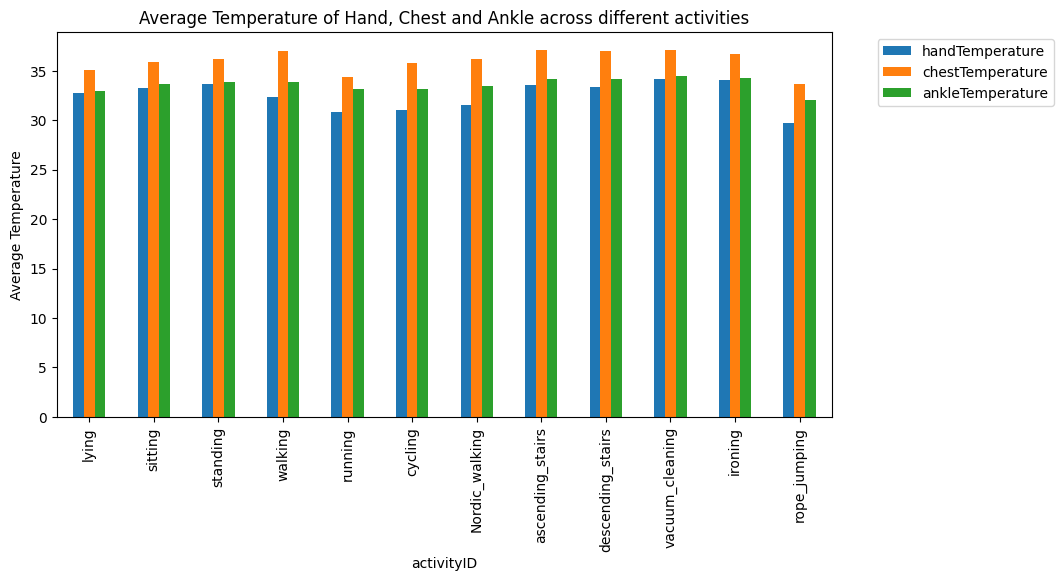

In [42]:
dfHand_Temperature = dfTrain['handTemperature'].groupby(dfTrain['activityID']).mean()  
dfChest_Temperature = dfTrain['chestTemperature'].groupby(dfTrain['activityID']).mean()
dfAnkle_Temperature = dfTrain['ankleTemperature'].groupby(dfTrain['activityID']).mean()

dfHand_Temperature.index = dfHand_Temperature.index.map(activityID_dict)
dfChest_Temperature.index = dfChest_Temperature.index.map(activityID_dict)
dfAnkle_Temperature.index = dfAnkle_Temperature.index.map(activityID_dict)

# concatenating the different means so that it can be plotted in the same plot as a tripple bar graph
dfTemperature_avg = pd.concat([dfHand_Temperature,dfChest_Temperature,dfAnkle_Temperature],axis = 1)
dfTemperature_avg.plot(kind = 'bar', figsize = (10,5))
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.ylabel('Average Temperature')
plt.title('Average Temperature of Hand, Chest and Ankle across different activities')
plt.show()

The graph above illustrates agreement with the previous summary statistics. Activities involving extremely strong hand movement, such as jumping rope, cycling, and running, resulted in much lower hand temperatures.


Visualizing the average temperatures of the subjects

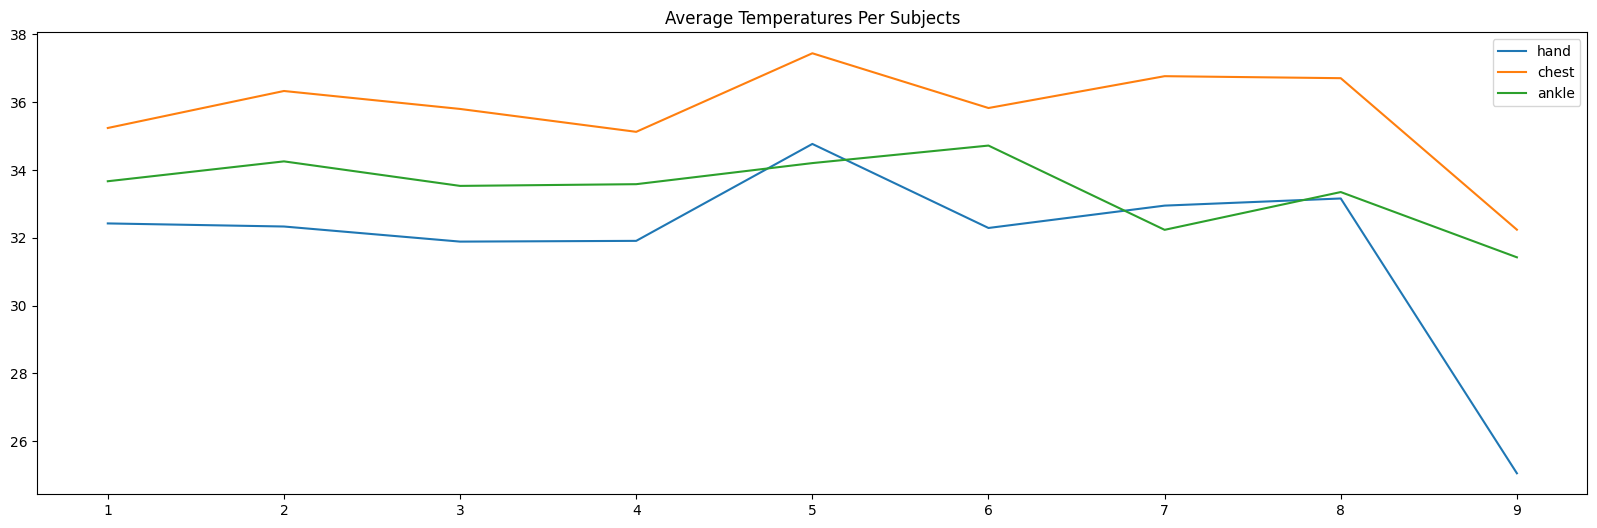

In [43]:
uniqueTempID = dfTrain.groupby(['subject_id']).mean().reset_index()

dfTemperature = pd.DataFrame()
dfTemperature['hand'] = uniqueTempID['handTemperature']
dfTemperature['chest'] = uniqueTempID['chestTemperature']
dfTemperature['ankle'] = uniqueTempID['ankleTemperature']

ax = dfTemperature.plot(kind='line', figsize=(20,6), title='Average Temperatures Per Subjects')
ax.set_xticklabels(uniqueTempID['subject_id'])
ax.legend(fontsize = 10)
ax.set_xticks(np.arange(len(dfTemperature)))
plt.show()

Regarding the subjects, it is clear that subject 9 has the lowest mean temperatures for the three sensors that were used to measure them (hand, chest, and ankle).

### 3.6 Acceleration analysis
Acceleration analysis is known as the examination of acceleration variations over time. The rate of change of an object's velocity, which is the derivative of velocity with respect to time, must be calculated. 


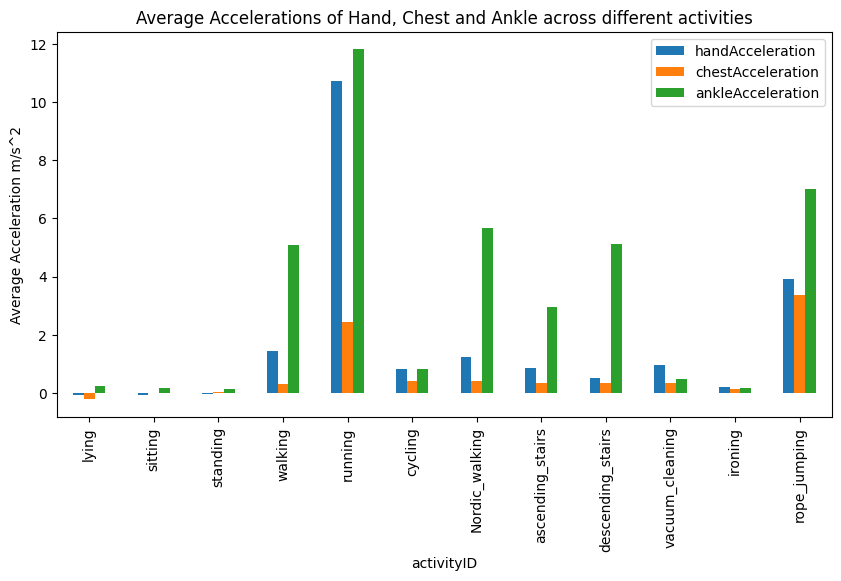

In [45]:
# We are subtracting Gravitational acceleration (9.81) from each values in order to improve the depiction of the body part's movement.
dfHand_Acceleration = dfTrain['handAcceleration'].groupby(dfTrain['activityID']).mean() - 9.81 
dfChest_Acceleration = dfTrain['chestAcceleration'].groupby(dfTrain['activityID']).mean() - 9.81
dfAnkle_Acceleration = dfTrain['ankleAcceleration'].groupby(dfTrain['activityID']).mean() - 9.81

dfHand_Acceleration.index = dfHand_Acceleration.index.map(activityID_dict)
dfChest_Acceleration.index = dfChest_Acceleration.index.map(activityID_dict)
dfAnkle_Acceleration.index = dfAnkle_Acceleration.index.map(activityID_dict)

# concatenating the different means so that it can be plotted in the same plot as a tripple bar graph
dfAcceleration_avg = pd.concat([dfHand_Acceleration,dfChest_Acceleration,dfAnkle_Acceleration],axis = 1)
dfAcceleration_avg.plot(kind = 'bar', figsize = (10,5))
plt.ylabel('Average Acceleration m/s^2')
plt.title('Average Accelerations of Hand, Chest and Ankle across different activities')
plt.show()

As is normally expected, the mean acceleration of different body parts is fairly low when performing physically undemanding activities (such as sleeping, sitting, standing, and ironing). Nevertheless, physically demanding activities like running and rope jumping have observably high ankle and hand mean acceleration values. The only exception is cycling, which doesn't require as much leg flexibility as Nordic walking, stair climbing, or walking. Practically all activities have minimal chest acceleration, with the exception of running and rope jumping.

### 3.7 Angular Velocity Analysis
The pace at which an item rotates around a point or axis is measured by its angular velocity. It is measured in radians per second (rad/s) and is generally represented by the sign omega (w).


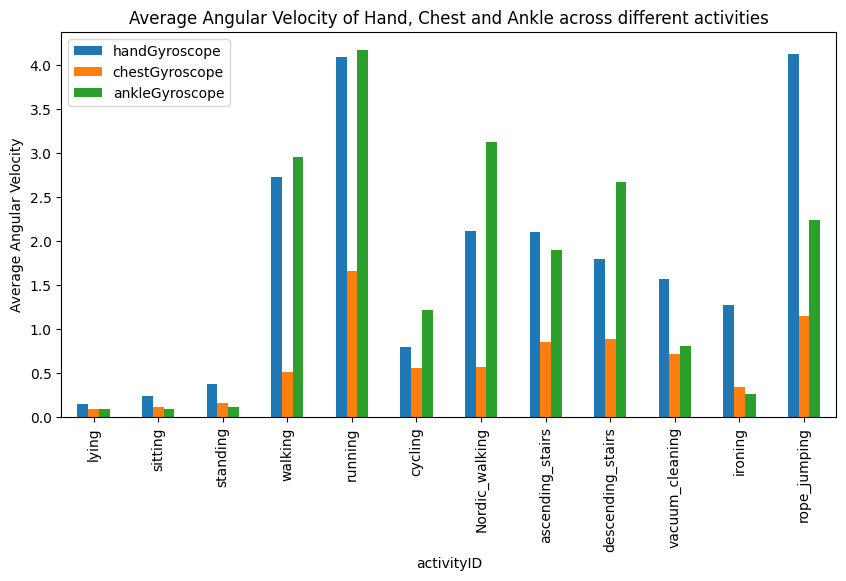

In [46]:
dfHand_AngularVelocity = dfTrain['handGyroscope'].groupby(dfTrain['activityID']).mean()  
dfChest_AngularVelocity = dfTrain['chestGyroscope'].groupby(dfTrain['activityID']).mean()
dfAnkle_AngularVelocity = dfTrain['ankleGyroscope'].groupby(dfTrain['activityID']).mean()

dfHand_AngularVelocity.index = dfHand_AngularVelocity.index.map(activityID_dict)
dfChest_AngularVelocity.index = dfChest_AngularVelocity.index.map(activityID_dict)
dfAnkle_AngularVelocity.index = dfAnkle_AngularVelocity.index.map(activityID_dict)

# concatenating the different means so that it can be plotted in the same plot as a tripple bar graph
dfAngVel_avg = pd.concat([dfHand_AngularVelocity,dfChest_AngularVelocity,dfAnkle_AngularVelocity],axis = 1)
dfAngVel_avg.plot(kind = 'bar', figsize = (10,5))
plt.ylabel('Average Angular Velocity')
plt.title('Average Angular Velocity of Hand, Chest and Ankle across different activities')
plt.show()

The accompanying bar chart shows that physically undemanding occupations have low angular velocities for each body part, with the exception of ironing, which has a considerable mean angular acceleration in the hand. Running causes the hand and ankle to accelerate angularly at a rapid rate (4.2rad/sec). Rope jumping produces the highest mean hand angular acceleration (4.5rad/sec), however, ankle acceleration is incredibly slower in comparison to hand acceleration. Going downstairs is much faster on average than going up them.

### 3.8 Sensor Analysis
Sensor analysis refers to the process of analysing and interpreting data gathered by sensors. Health monitoring is one of the many uses for sensor analysis.

Exploring the average values of all sensor data for the different subject IDs

In [47]:
# pivoting the table with respect to the subject ID
dfMean = dfTrain.pivot_table(index='subject_id')
dfMean = dfMean.drop(["activityID","timestamp"],axis = 1)
dfMean

,ankleAcceleration,ankleGyroscope,ankleTemperature,chestAcceleration,chestGyroscope,chestTemperature,handAcceleration,handGyroscope,handTemperature,heartRate
subject_id,,,,,,,,,,
1,12.613012,1.400300,33.667876,10.302390,0.579408,35.238564,11.179297,1.688628,32.423884,122.302059
2,12.160482,1.517965,34.254049,10.224044,0.596029,36.329774,10.818192,1.835693,32.332976,109.592873
3,11.786505,0.999310,33.530801,9.940457,0.395654,35.800403,10.682006,1.468212,31.887581,95.046416
4,11.581570,1.162349,33.581195,9.994052,0.451524,35.125472,10.279740,1.189798,31.909696,109.357853
5,12.846668,1.608244,34.203253,10.329820,0.546795,37.442117,11.095179,1.522842,34.768169,108.474464
6,12.578789,1.563441,34.720111,10.183602,0.609790,35.827700,11.939162,1.681059,32.289608,103.068764
7,12.481160,1.445724,32.235016,10.026194,0.412709,36.766594,10.414043,1.042343,32.949067,96.339431
8,12.772193,1.545705,33.349282,10.411444,0.505248,36.707491,11.253402,1.561773,33.159516,109.839771
9,17.521260,2.210743,31.424601,12.644138,1.051567,32.239495,14.087466,3.067980,25.054920,148.755319


The subject ID 9 in the dataframe above has the highest mean values for all sensory data, with the exception of temperature data, as well as a very high mean heart rate of 147.59 bpm. Subject 9 has only engaged in one protocol activity—rope jumping—so the statistics are severely biased. If we solely consider rope jumping, the heart rates of the other subjects would seem comparable.

Exploring the average value of all the sensor data for different activities

In [48]:
#Pivoting the table with respect to the activity ID
dfMean_activity = dfTrain.pivot_table(index = 'activityID')
dfMean_activity.index  = dfMean_activity.index.map(activityID_dict)
dfMean_activity=dfMean_activity.drop(['subject_id'],axis = 1)
dfMean_activity

,ankleAcceleration,ankleGyroscope,ankleTemperature,chestAcceleration,chestGyroscope,chestTemperature,handAcceleration,handGyroscope,handTemperature,heartRate,timestamp
activityID,,,,,,,,,,,
lying,10.061194,0.092012,32.981105,9.588401,0.094124,35.093265,9.727403,0.151788,32.732067,75.531310,205.850482
sitting,9.967515,0.095302,33.640865,9.818999,0.115328,35.829001,9.753517,0.243859,33.266162,80.033918,506.510255
standing,9.952429,0.112667,33.896652,9.836456,0.158201,36.165968,9.775886,0.373467,33.638916,88.511740,732.981550
walking,14.907163,2.960087,33.840933,10.126148,0.515730,37.004439,11.261583,2.728421,32.294685,112.802390,2429.260349
running,21.615107,4.167381,33.143160,12.252771,1.659568,34.400110,20.532867,4.087860,30.815160,156.503295,3444.092422
cycling,10.637162,1.220326,33.170561,10.213148,0.559410,35.724937,10.642257,0.798797,31.007691,124.819406,3128.516791
Nordic_walking,15.496463,3.120516,33.444321,10.222161,0.562689,36.149393,11.043161,2.112659,31.527517,123.816616,2905.772210
ascending_stairs,12.772740,1.899278,34.176349,10.150155,0.856046,37.054739,10.666193,2.101297,33.527744,129.746890,1808.024297
descending_stairs,14.940593,2.669559,34.174868,10.169157,0.886600,37.016809,10.340545,1.792820,33.322322,129.177587,1906.726765


The most important discovery from this table is that temperature is the only sensor data that for rope jumping is not at its maximum while all other collected readings had the highest values. Additionally, all sensor data were limited during lying activities, with the exception of ankle acceleration and temperature.

### 3.8.1 Correleation Analysis of the Sensor data.
Correlation analysis can be used to analyze the relationship between the sensor data and other variables.

Since the majority of sensor data distribution does not follow a normal distribution, In determining the correlation between the sensor data and other variables, we will use the Spearman correlation method.

In [49]:
#dropping unsuitable columns for the correlation analysis
dfTrain_corr = dfTrain.drop(['subject_id','activityID','timestamp'],axis =1)
#Running the spearman correlation
dfTrain_corr.corr(method = 'spearman').style.background_gradient()

,heartRate,handTemperature,chestTemperature,ankleTemperature,handAcceleration,chestAcceleration,ankleAcceleration,handGyroscope,chestGyroscope,ankleGyroscope
heartRate,1.000000,-0.346925,-0.040121,-0.056197,0.168648,0.086825,0.254717,0.609616,0.645223,0.692476
handTemperature,-0.346925,1.000000,0.743749,0.503030,-0.116877,0.020019,-0.113165,-0.157177,-0.138704,-0.254107
chestTemperature,-0.040121,0.743749,1.000000,0.451462,-0.045319,0.073205,0.043990,0.120575,0.094162,0.125284
ankleTemperature,-0.056197,0.503030,0.451462,1.000000,-0.007623,0.048268,-0.043878,0.122279,0.075102,-0.006643
handAcceleration,0.168648,-0.116877,-0.045319,-0.007623,1.000000,0.386504,0.165352,0.238789,0.214349,0.171814
chestAcceleration,0.086825,0.020019,0.073205,0.048268,0.386504,1.000000,0.199923,0.063910,0.130067,0.093713
ankleAcceleration,0.254717,-0.113165,0.043990,-0.043878,0.165352,0.199923,1.000000,0.209017,0.244250,0.383080
handGyroscope,0.609616,-0.157177,0.120575,0.122279,0.238789,0.063910,0.209017,1.000000,0.718811,0.694865
chestGyroscope,0.645223,-0.138704,0.094162,0.075102,0.214349,0.130067,0.244250,0.718811,1.000000,0.723575
ankleGyroscope,0.692476,-0.254107,0.125284,-0.006643,0.171814,0.093713,0.383080,0.694865,0.723575,1.000000


As seen from the correlation heat map above that there is a strong correlation between the heart rate and all measurements of angular velocity (hand, chest, and ankle). 

One interesting observation is the negative correlation between heart rate and hand temperature $(-0.35)$, heart rate and chest temperature $(-0.04)$ and heart rate and ankle temperature $(-0.06)$.

Despite there are positive correlation between the acceleration measurments, as indicated they are a strong correlation.

There is a positive correlation being observeed between all of the temperature measurements.

Another interesting thing to notice is that all measures of angular velocity are highly positively correlated with one another.

## 4.0 Hypothesis Testing
The goal of this hypothesis testing is to determine whether the hypothesis is true or false based on the sample data.

Define a function to calculate the correlation and p-values

Note: Since the hypothesis is based on correlation from a abnormal distributed data, we adopt the spearmanr method

In [104]:
def hypothesis_testCorr(data1,data2):
    #spearmanr gives correlation and p_value as output
    correlation,p_value = spearmanr(data1,data2)
    print(f'correlation between the parameters = {correlation}')
    print(f'p_value = {p_value}')
    for k in [0.01 , 0.05, 0.1]:
        if p_value < k:
            print(f'The null Hypothesis H0 is rejected at a confidence interval of {100 -k*100}% and the alternate hypothesis is accepted')
            break

        else:
            print(f'Failed to reject the null Hypothesis at {100-k*100}% confidence interval')

### 4.1.1 Hypothesis 1 
High hand angular velocity should results in high heart rates

Hypothesis: If $hand$ $angular$ $velocity$ correlates positively with heart rates, then for high hand angular velocity, heart rate should be high

Null Hypothesis (𝐻0): Correlation = 0

Alternate Hypothesis (𝐻1): Correleation> 0

In [105]:
hypothesis_testCorr(dfTest['handGyroscope'],dfTest['heartRate']) 

correlation between the parameters = 0.6084874162065737
p_value = 0.0
The null Hypothesis H0 is rejected at a confidence interval of 99.0% and the alternate hypothesis is accepted


According to the results of the above hypothesis testing, there is a statistically significant positive link between the $hand$ $angular$ $velocity$ and $heart$ $rate$.

### 4.1.2 Hypothesis 2
High $chest$ $angular$ $velocity$ should results in high heart rates

Hypothesis: If chest angular velocity correlates positively with heart rates, then for high chest angular velocity, heart rate should be high

Null Hypothesis (𝐻0): Correlation = 0

Alternate Hypothesis (𝐻1): Correleation> 0

In [ ]:
hypothesis_testCorr(dfTest['chestGyroscope'],dfTest['heartRate']) 

According to the results of the above hypothesis testing, there is a statistically significant positive link between the $chest$ $angular$ $velocity$ and $heart$ $rate$.

### 4.1.3 Hypothesis 3
High $ankle$ $angular$ $velocity$ should results in high heart rates

Hypothesis: If the ankle angular velocity correlates positively with the heart rates, then for high ankle angular velocity, heart rate should be high

Null Hypothesis (𝐻0): Correlation = 0

Alternate Hypothesis (𝐻1): Correleation> 0

In [ ]:
hypothesis_testCorr(dfTest['ankleGyroscope'],dfTest['heartRate']) 

According to the results of the above hypothesis testing, there is a statistically significant positive link between the ankle's angular velocity and heart rate.

## 5.0 Developing Model 
Models are frequently used to simulate, predict, or analyse how the systems they represent will behave. Making decisions about complicated systems and comprehending them can be facilitated by modelling. Our objective is to aid in the development of software and technologies for monitoring human activity. To do this, we must develop and test a model that utilises sensor data to predict an individual's activities.
Data from the gyroscope, heart rate, and acceleration would be used to generate the models.

### 5.1 Importing all the required modules and libraries

In [51]:
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# get the list of 12 activities 
activityList = list(dfHand_AngularVelocity.index)
activityList

['lying',
 'sitting',
 'standing',
 'walking',
 'running',
 'cycling',
 'Nordic_walking',
 'ascending_stairs',
 'descending_stairs',
 'vacuum_cleaning',
 'ironing',
 'rope_jumping']

### 5.2 Data preparation and function defination for the model

In [54]:
dfCleaned_mod = dfCleaned.sample(frac = 1, random_state = 33)

#Dropping timestamp and subject id
dfCleaned_mod = dfCleaned_mod.drop(['timestamp','subject_id'],axis = 1)

#Creating the features dataframe
dfFeature = dfCleaned_mod.drop(['activityID'],axis = 1)
#Creating the target dataframe
dfTarget = dfCleaned_mod['activityID']

In [55]:
#We are using Robust scaler  since the data is skewed and not normally distributed
scaler = RobustScaler()

# create test train split
x_train,x_test,y_train,y_test = train_test_split(dfFeature,dfTarget,test_size = 0.2,random_state = 42)
#scaling the train data
x_train = scaler.fit_transform(x_train)
#scaling the train data using the same scalar object
x_test = scaler.transform(x_test)

Creating the function to get accuracy,precision,Recall and F1 score of the data

In [56]:
def getMetrics (y_obs,y_forc):
    #Accuracy score
    accuracy = accuracy_score(y_obs, y_forc)
    #Average precision
    precision = precision_score(y_obs,y_forc,average=None).mean()
    #Average recall
    recall = recall_score(y_obs,y_forc,average=None).mean()
    #Average f1 score
    f1 = f1_score(y_obs,y_forc,average=None).mean()
   
    print("Accuracy:  ",accuracy)
    print("Precision: ", precision)
    print("Recall:    ", recall)
    print("F1:        ", f1)

Create a function to generate and display the confusion matrix

In [57]:
def show_confusionMatrix(y_obs,y_forc):  
    cMatrix = confusion_matrix(y_obs,y_forc)
    #setting the scale to get bigger display
    plt.rcParams['figure.figsize'] = (10,7)
    disp = ConfusionMatrixDisplay(confusion_matrix= cMatrix, display_labels = activityList)
    disp.plot(xticks_rotation= 'vertical',cmap = 'binary' )
    plt.show()

### 5.3 Dimensionality Reduction using Principal Component Analysis (PCA)

Reducing the number of dimensions in the data while retaining as much of the data as feasible is the aim of PCA. When working with high-dimensional datasets, this can be helpful since it helps simplify the data and make it simpler to visualise and analyse.

Typically, 90–98% of the variance may satisfactorily account for our findings. Therefore, by plotting the variance ratio against the total number of components, we could calculate how many of them we could use. According to the graph below, 15 factors account for over 94% of the variation.


The model may require a significant amount of time to train and test because of a large number of features. However, we may project and reduce the dimension of the features using PCA (principle component analysis),  which might decrease the time between training and testing.

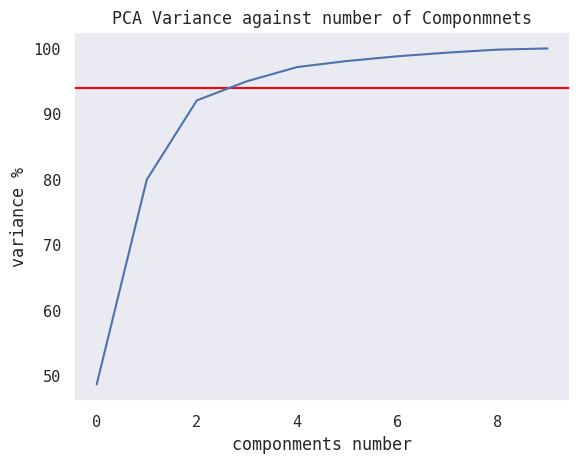

In [58]:
from sklearn.decomposition import PCA

pca = PCA()

#Fitting the training data
pca.fit(x_train)

#explains the amount of variance that the number of components can capture
var= pca.explained_variance_ratio_ 
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against number of Componmnets")
plt.ylabel("variance %")
plt.xlabel("componments number")

#How many components we must take into account to capture 94% variance will be revealed at the intersection of the line and the curve.
line_incpt = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

The above graph shows that both lines cross at x = 3, indicating that for our data, there are three (3) characteristics necessary to obtain a 94% of the variation.

### 5.4 Support Vector Classification (SVC) model using Principal Components Analysis (PCA)
Support Vector Machines (SVMs) are a type of supervised machine learning algorithm that can be used for classification or regression tasks.

As was previously mentioned, the Principal Component Analysis (PCA) method may be used to minimise the number of features in a dataset. This is accomplished by identifying an entirely new set of dimensions (known as "principal components") that are orthogonal to one another and that effectively encapsulate the range of the data.

One technique to combine PCA with an SVM is to first use PCA to make the dataset less dimensional, and then train the SVM on the new, smaller dataset. This can aid in bringing down the model's complexity and enhancing its generalisation capabilities.

In [59]:
#Creating PCA object for 3 features, based on the PCA dimension reduction carried out above...
pca = PCA(n_components=3)

#Fitting X_train
x_train=pca.fit_transform(x_train)

#Using the same pca object to transform x_test
x_test=pca.transform(x_test)

In [61]:
#PCA_1,PCA_2,PCA_3 are the 3 columns created by the PCA object
x_train_df = pd.DataFrame(x_train,columns=['PCA_1','PCA_2','PCA_3' ])
x_train_df

,PCA_1,PCA_2,PCA_3
0,-0.680891,3.107869,3.990833
1,8.083458,0.160540,-0.271865
2,5.764619,0.681997,-0.841284
3,-1.475020,-0.855593,-0.727378
4,-1.549365,-0.767149,-0.556049
...,...,...,...
141921,3.239599,-3.953335,0.736961
141922,4.742547,-3.621729,1.567366
141923,-0.290950,-1.527500,1.191228
141924,-1.641112,-0.723916,-0.567074


In [62]:
# magic command that measures the execution time of the cell (in Jyputer Notebook).
%%time
from sklearn.svm import SVC

# creating a instance of the SVC class using the kernel parameter "rbf" which stands for Radial Basis Function.
svcModel = SVC(kernel = 'rbf')
svcModel.fit(x_train, y_train)

CPU times: total: 17min 45s
Wall time: 18min 7s


SVC()

From the output above, it can be observed that the SVC model takes a little over 18 mins to train the data with PCA approach, now lets compare this when we train without the PCA approach.

In [63]:
%%time
svcModel_y_forc = svcModel.predict(x_test)

print(len(svcModel_y_forc))
print(len(y_test))
print(svcModel_y_forc[0:5])
print(y_test[0:5])

getMetrics(y_test,svcModel_y_forc)

35482
35482
[ 3 17 16 17  7]
180346     13
468725     17
1552567    16
2216032     3
713258      7
Name: activityID, dtype: int64
Accuracy:   0.42669522574826674
Precision:  0.44672029568250965
Recall:     0.39149542374499996
F1:         0.37278319549455646
CPU times: total: 11min 34s
Wall time: 11min 48s


On the other hand, as shown in the result above, it took about 11 mins 48s to test the data using the  PCA approach.
It also shows the accuracy score of 43% which is a very low.

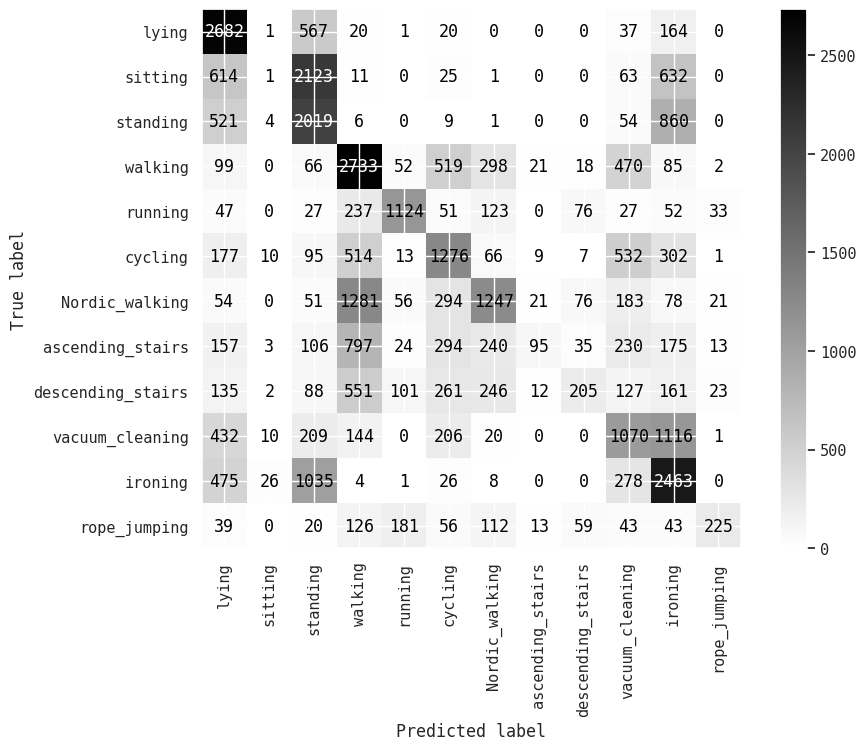

In [64]:
# display the confusion matrix
show_confusionMatrix(y_test,svcModel_y_forc)

In the above result with the used SVM model with PCA we obtained very low scores. In order to determine whether it is because of the implemetation of PCA let us check without the PCA.

### 5.5 Support Vector Classification (SVC) model without using Principal Components Analysis (PCA) 

In [65]:
#shuffling the dataset
dfCleaned_mod2 = dfCleaned.sample(frac = 1, random_state = 33)
#Dropping timestamp and subject ID
dfCleaned_mod2 = dfCleaned_mod2.drop(['timestamp','subject_id'],axis = 1)
#features dataframe
dfFeature = dfCleaned_mod2.drop(['activityID'],axis = 1)
#target dataframe
dfTarget = dfCleaned_mod2['activityID']

In [66]:
scaler = RobustScaler()

xx_train,xx_test,yy_train,yy_test = train_test_split(dfFeature,dfTarget,test_size = 0.2,random_state = 42)

xx_train = scaler.fit_transform(xx_train)

xx_test = scaler.transform(xx_test)

In [67]:
%%time
svcModel = SVC(kernel = 'rbf')
svcModel.fit(xx_train, yy_train)

CPU times: total: 12min 11s
Wall time: 12min 26s


SVC()

Now, we can see that fitting and training the SVC model took just 12 minutes and 26 seconds, compared to 19 minutes for the PCA strategy. This is not the expected result of both of these approaches, as PCA should lower the time spent given the projected reduction in the dimension of our data. This was not the case with our observation.

In [68]:
%%time
svcModel_y_forc2 = svcModel.predict(xx_test)

print(len(svcModel_y_forc2))
print(len(y_test))
print(svcModel_y_forc2[0:5])
print(y_test[0:5])

getMetrics(yy_test,svcModel_y_forc2)

35482
35482
[13 16 16  3  7]
180346     13
468725     17
1552567    16
2216032     3
713258      7
Name: activityID, dtype: int64
Accuracy:   0.770644270334254
Precision:  0.7798086302585027
Recall:     0.7541662458881611
F1:         0.7620052463038104
CPU times: total: 9min 31s
Wall time: 9min 45s


We can see that a time decrease as compared to using the PCA approach, which is similar to the observation with the train data. Without using the PCA approach, testing the data took 9 minutes, 45 seconds in total.

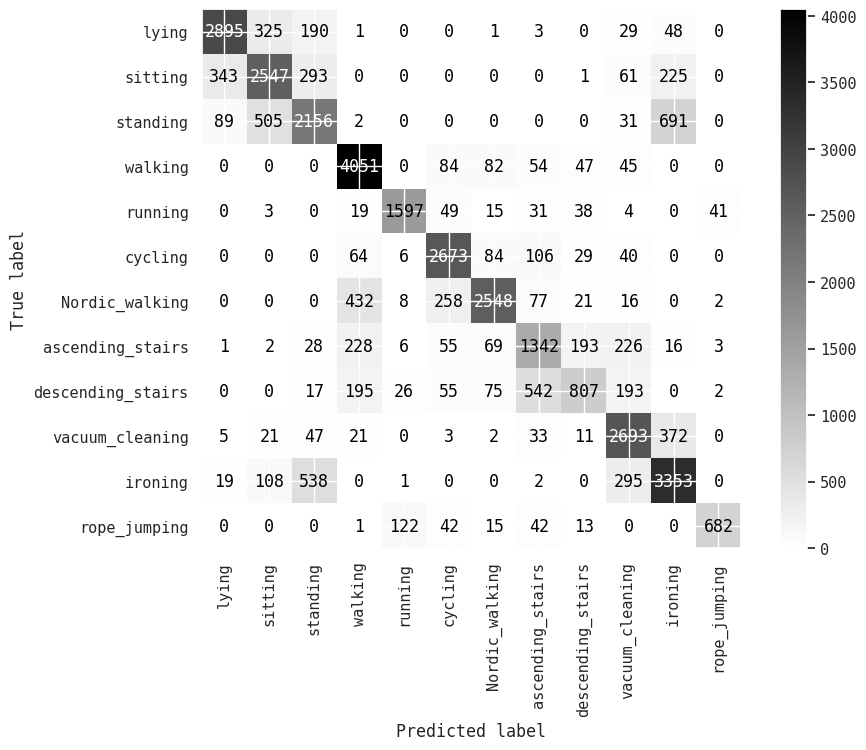

In [69]:
#shows the confusion matrix
show_confusionMatrix(yy_test,svcModel_y_forc2)

We obtain an accuracy of $\approx$ $78$ % without performing dimensionality reduction (using PCA ), which is a pretty substantial difference to the $\approx$ $44$ % obtained with PCA. Based on the significant difference in accuracy values, going forward, we will stick to running this analysis without PCA. Also, unexpectedly the analysis with PCA takes much longer than running the SVM without PCA

### 5.6 Comparing Random Forest vs Logistic Regression model
Random forests and logistic regression are two different types of machine learning models that can be used for classification tasks.
#### 5.6.1 Random Forest Classifier Model
As an ensemble model, random forests involve several kinds of decision trees to generate predictions. A final prediction is made after the training of these decision trees on various subsets of the training data. Since random forests can prevent overfitting and improve generalisation to new data, they are often more accurate and resilient than individual decision trees. However, compared to more straightforward models like logistic regression, they can also be more computationally expensive to train and used.

In [70]:
%%time
#creating the model object
randFC = RandomForestClassifier()
randFC.fit(xx_train,yy_train)

randFC_y_forc = randFC.predict(xx_test)

print(len(randFC_y_forc))
print(len(yy_test))
print(randFC_y_forc[0:5]) #comparing values of the first 5 predictions
print(yy_test[0:5])

getMetrics(yy_test,randFC_y_forc)

35482
35482
[13 17 16  3  7]
180346     13
468725     17
1552567    16
2216032     3
713258      7
Name: activityID, dtype: int64
Accuracy:   0.9970125697536779
Precision:  0.996541979303576
Recall:     0.9964615462541625
F1:         0.996498842386787
CPU times: total: 1min 24s
Wall time: 1min 26s


Random Forest Classifier model took just about 1min 26 seconds to trian the model which is pretty awesome and also, the model has very perfect scores(accuracy = 99.7% ) by using all the sensor data as the input

#### 5.6.2 Logistic Regression Model
The linear model used for classification is called logistic regression, on the other hand. It is taught to predict the likelihood that a given example belongs to a specific class, and it then makes a prediction based on whether or not that probability is greater than or less than a set threshold. Given its simplicity and readability, logistic regression is frequently utilised as the foundational model for classification problems. It may not perform as well as more powerful models like random forests on some tasks, though, because it might find it difficult to capture intricate nonlinear correlations in the data.

In [71]:
%%time
logRM = LogisticRegression()
logRM.fit(X=xx_train, y=yy_train )

logRM_y_forc = logRM.predict(xx_test)

print(len(logRM_y_forc))
print(len(yy_test))
print(logRM_y_forc[0:5]) #comparing values of the first 5 predictions
print(yy_test[0:5])

getMetrics(yy_test, logRM_y_forc)

35482
35482
[16 16 16  2  7]
180346     13
468725     17
1552567    16
2216032     3
713258      7
Name: activityID, dtype: int64
Accuracy:   0.6229919395749958
Precision:  0.6130694988165205
Recall:     0.6038198446436113
F1:         0.6045935763907722
CPU times: total: 26.6 s
Wall time: 10.2 s


Despite the shorter execution time for the logistic regression model (about 10.2 seconds), but it  give a far lesser accuracy, 62.3% compared to the result of the random forest classifier.

### 5.7 Applying Random Forest Classifier to the dataset

#### 5.7.1 Applying Random Forest Classifier without gyroscope data

In [72]:
#drop subject ID, timestamp and gyroscope data
dfCleaned_randomForestClassifier = dfCleaned.drop(['subject_id','timestamp','handGyroscope','chestGyroscope','ankleGyroscope'],axis = 1)

In [73]:
dfFeatures_RandFC = dfCleaned_randomForestClassifier.drop(['activityID'],axis = 1)
dfTarget_RandFC = dfCleaned_randomForestClassifier['activityID']

In [74]:
scaler = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(dfFeatures_RandFC,dfTarget_RandFC,test_size = 0.2,random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [75]:
%%time
randFC = RandomForestClassifier()
randFC.fit(x_train,y_train)

CPU times: total: 41.2 s
Wall time: 41.9 s


RandomForestClassifier()

In [76]:
%%time
randFC_y_forc = randFC.predict(x_test)

print(len(randFC_y_forc))
print(len(y_test))
print(randFC_y_forc[0:5]) #comparing values of the first 5 predictions
print(y_test[0:5])

getMetrics(y_test,randFC_y_forc)

35482
35482
[ 5  1 16 17  6]
2114271     5
2166203     1
973135     16
2227352    17
1716930     6
Name: activityID, dtype: int64
Accuracy:   0.9962234372357816
Precision:  0.9950360605561831
Recall:     0.9947529707380381
F1:         0.994889101431318
CPU times: total: 984 ms
Wall time: 981 ms


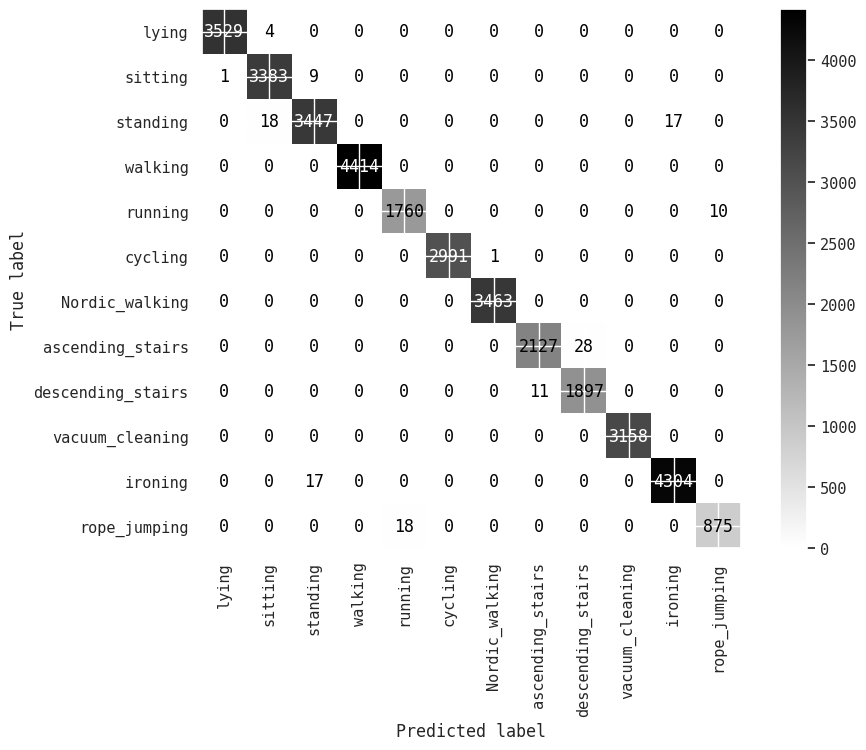

In [77]:
show_confusionMatrix(y_test,randFC_y_forc)

Even now, we still achieved a very high accuracy rating (99.63%) despite not using all the sensors with a execution time of 41.9 seconds. However, the confusion matrix shows that a large portion of the rope-jumping action is now categorised as running since gyroscope sensor data is not there. Therefore, it is not a good idea to avoid the gyroscope sensor if a person is very physically active because it would misidentify the heavy actions.

###  5.7.2 Applying Random Forest Classifier without temperature sensor data

In [78]:
dfCleaned_randomForestClassifier2 = dfCleaned.drop(['subject_id','timestamp','handTemperature','chestTemperature','ankleTemperature'],axis = 1)

In [79]:
dfFeatures_RandFC2 = dfCleaned_randomForestClassifier2.drop(['activityID'],axis = 1)
dfTarget_RandFC2 = dfCleaned_randomForestClassifier2['activityID']

In [81]:
scaler = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(dfFeatures_RandFC2,dfTarget_RandFC2,test_size = 0.2,random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [82]:
%%time
randFC = RandomForestClassifier()
randFC.fit(x_train,y_train)

CPU times: total: 1min 33s
Wall time: 1min 34s


RandomForestClassifier()

In [83]:
%%time
randFC_y_forc = randFC.predict(x_test)

print(len(randFC_y_forc))
print(len(y_test))
print(randFC_y_forc[0:5]) #comparing values of the first 5 predictions
print(y_test[0:5])

getMetrics(y_test,randFC_y_forc)

35482
35482
[ 5  1 16 17  6]
2114271     5
2166203     1
973135     16
2227352    17
1716930     6
Name: activityID, dtype: int64
Accuracy:   0.7300603122710106
Precision:  0.7365325404899689
Recall:     0.7141295224250951
F1:         0.7216905843618018
CPU times: total: 1.91 s
Wall time: 1.92 s


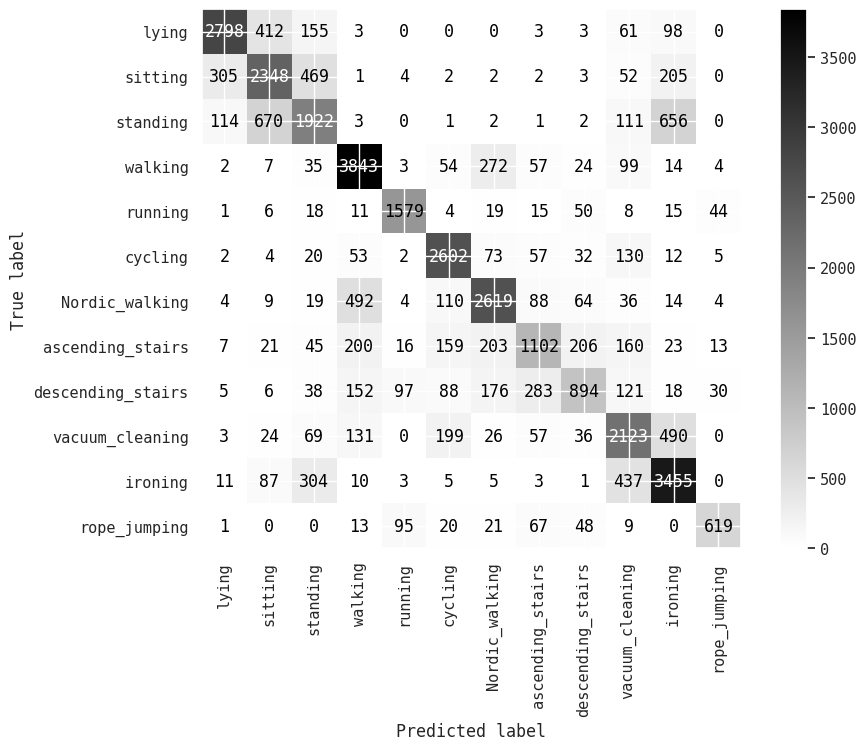

In [84]:
show_confusionMatrix(y_test,randFC_y_forc)

As a result, we may draw a conclusion from our observations that removing the temperature sensor makes it difficult for the model to appropriately classify the activities.  Therefore, it is acceptable to say that a temperature sensor is an essential component of equipment for gathering data. 

### 5.8 Location of the sensors

At this point, as we work to build technology that can identify activities, sensors cannot be worn in every area of the body. As a result, the hand or ankle should be where the gadget is attached. If we are just comparing the two positions for convenience, it should be held in the hand. The question of whether there is a large accuracy difference between the two perspectives remains to be answered.

#### 5.8.1 Applying random forest classifier for hand-held sensor data

In [85]:
dfCleaned_mod = dfCleaned.sample(frac = 1, random_state = 33)

In [86]:
dfCleaned_Hand = dfCleaned_mod.drop(['timestamp','subject_id','chestAcceleration','ankleAcceleration','chestTemperature','ankleTemperature','chestGyroscope','ankleGyroscope'],axis = 1)

In [87]:
dfFeatures_Hand = dfCleaned_Hand.drop(['activityID'],axis = 1)
dfTarget_Hand = dfCleaned_Hand['activityID']

In [88]:
scaler = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(dfFeatures_Hand,dfTarget_Hand,test_size = 0.2,random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [89]:
%%time
randFC = RandomForestClassifier()
randFC.fit(x_train,y_train)

CPU times: total: 53.3 s
Wall time: 54.3 s


RandomForestClassifier()

In [90]:
%%time
randFC_y_forc = randFC.predict(x_test)

print(len(randFC_y_forc))
print(len(y_test))
print(randFC_y_forc[0:5]) #comparing values of the first 5 predictions
print(y_test[0:5])

getMetrics(y_test,randFC_y_forc)

35482
35482
[13 16 16  3  7]
180346     13
468725     17
1552567    16
2216032     3
713258      7
Name: activityID, dtype: int64
Accuracy:   0.9146609548503467
Precision:  0.9172238036939825
Recall:     0.9099932533894891
F1:         0.9133555672485457
CPU times: total: 1.5 s
Wall time: 1.51 s


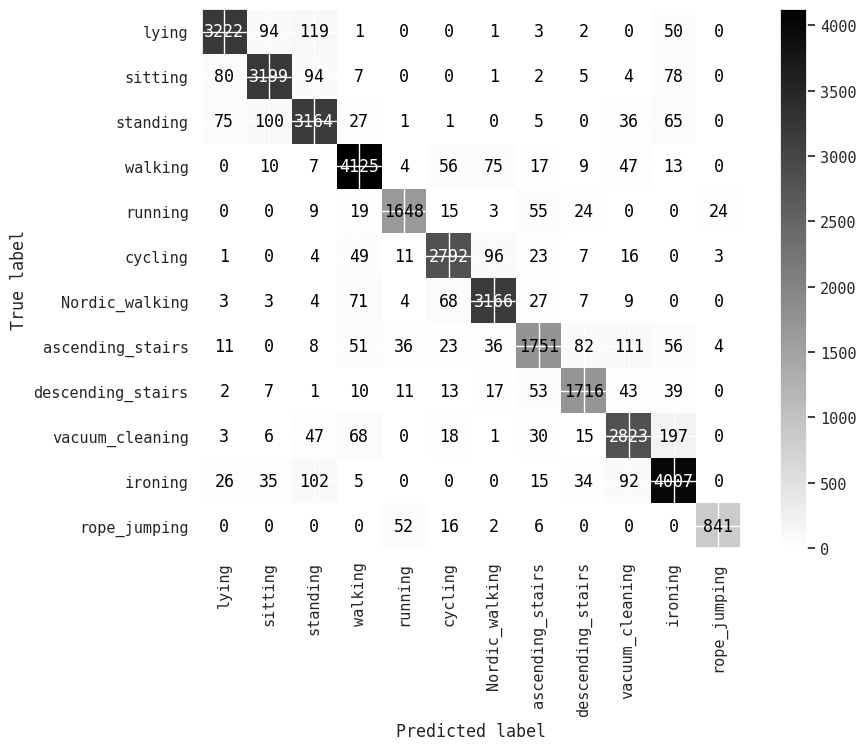

In [91]:
show_confusionMatrix(y_test,randFC_y_forc)

### 5.8.2 Applying random forest classifier, for ankle-held sensor data 

In [92]:
dfCleaned_Ankle = dfCleaned_mod.drop(['timestamp','subject_id','chestAcceleration','handAcceleration','chestTemperature','handTemperature','chestGyroscope','handGyroscope'],axis = 1)

In [93]:
dfFeatures_Ankle = dfCleaned_Ankle.drop(['activityID'],axis = 1)
dfTarget_Ankle = dfCleaned_Ankle['activityID']

In [94]:
scaler = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(dfFeatures_Ankle,dfTarget_Ankle,test_size = 0.2,random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
%%time
randFC = RandomForestClassifier()
randFC.fit(x_train,y_train)

CPU times: total: 56.7 s
Wall time: 57.7 s


RandomForestClassifier()

In [96]:
%%time
randFC_y_forc = randFC.predict(x_test)

print(len(randFC_y_forc))
print(len(y_test))
print(randFC_y_forc[0:5]) #comparing values of the first 5 predictions
print(y_test[0:5])

getMetrics(y_test,randFC_y_forc)

35482
35482
[13 17  3  3  7]
180346     13
468725     17
1552567    16
2216032     3
713258      7
Name: activityID, dtype: int64
Accuracy:   0.8918042951355617
Precision:  0.8931309677369895
Recall:     0.8835926304471139
F1:         0.8875831391415896
CPU times: total: 1.62 s
Wall time: 1.67 s


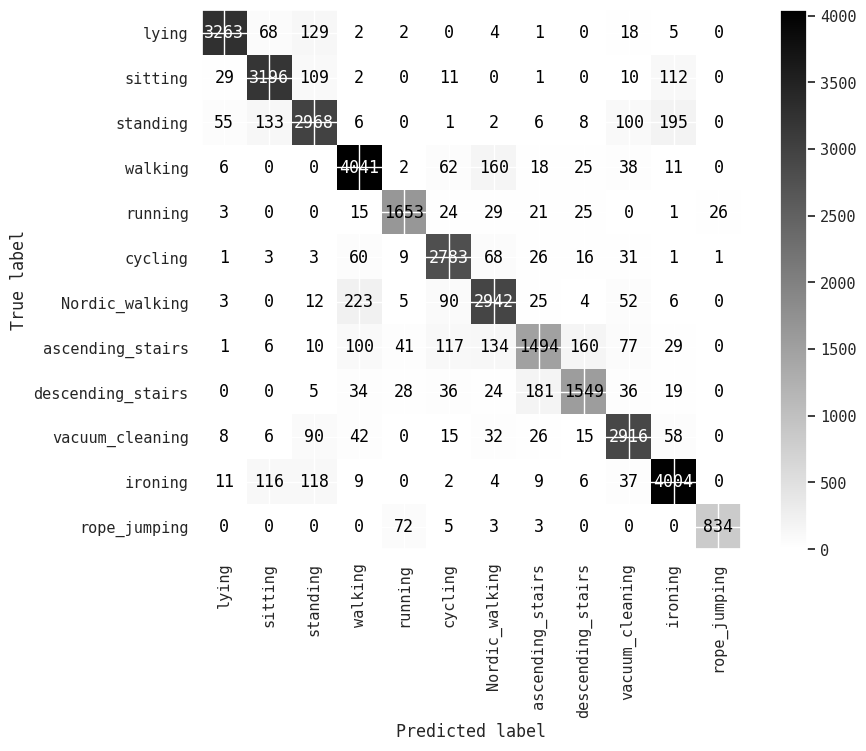

In [97]:
show_confusionMatrix(y_test,randFC_y_forc)

### 5.8.3 Applying random forest classifier for chest-held sensor data

In [98]:
dfCleaned_Chest = dfCleaned_mod.drop(['timestamp','subject_id','ankleAcceleration','handAcceleration','ankleTemperature','handTemperature','ankleGyroscope','handGyroscope'],axis = 1)

In [99]:
dfFeatures_Chest = dfCleaned_Chest.drop(['activityID'],axis = 1)
dfTarget_Chest = dfCleaned_Chest['activityID']

In [100]:
scaler = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(dfFeatures_Chest,dfTarget_Chest,test_size = 0.2,random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [101]:
%%time
randFC = RandomForestClassifier()
randFC.fit(x_train,y_train)

CPU times: total: 51.3 s
Wall time: 51.9 s


RandomForestClassifier()

In [102]:
%%time
randFC_y_forc = randFC.predict(x_test)

print(len(randFC_y_forc))
print(len(y_test))
print(randFC_y_forc[0:5]) #comparing values of the first 5 predictions
print(y_test[0:5])

getMetrics(y_test,randFC_y_forc)

35482
35482
[13 17 16  3  7]
180346     13
468725     17
1552567    16
2216032     3
713258      7
Name: activityID, dtype: int64
Accuracy:   0.9066568964545403
Precision:  0.9077322617190887
Recall:     0.903335509305904
F1:         0.9053201679992141
CPU times: total: 1.55 s
Wall time: 1.59 s


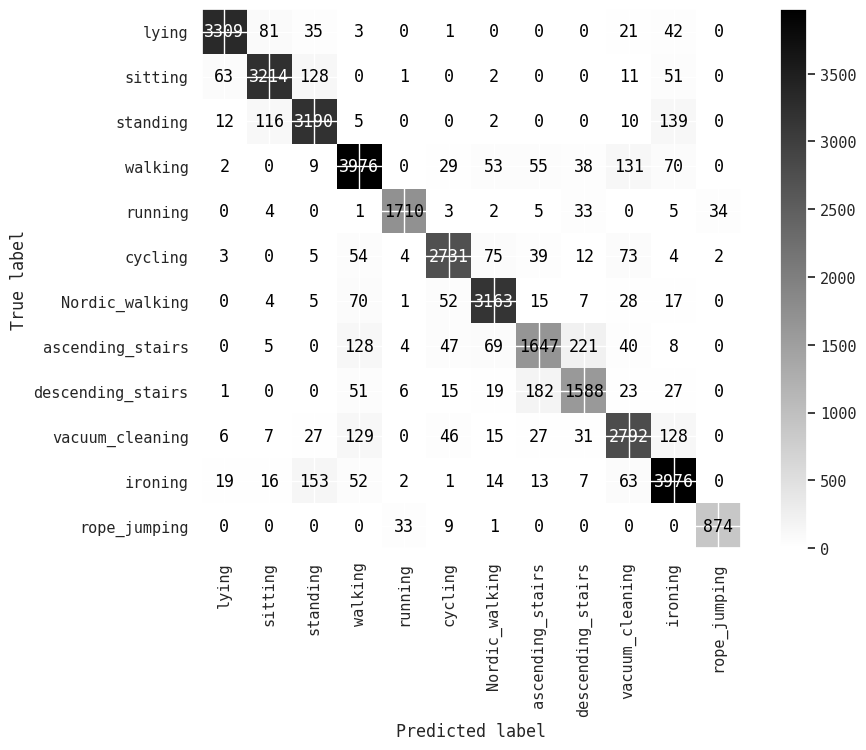

In [103]:
show_confusionMatrix(y_test,randFC_y_forc)

According to the random forest classifier models above, placing the device in the ankle and chest will have an accuracy of $89.88$% and $91.22$%, respectively. These accuracy percentages were lower than the $92.18$% accuracy that was obtained for device attached to the hand. As a result, the research advise that the devices be designed to be held in the user's hand.

## 6.0 Conclusion
The analysis of the PAMAP2 Physical Activity Monitoring dataset has drawn numerous of interesting findings. As an outcome of the application of multiple sensor data, it is now possible to utilise the sensor data combined as features to help design hardware and software that can predict which of the 12 protocol tasks a person will perform.

Hypothesis testing is carried out on the test data set to verify that our results from exploratory data analysis are statistically significant.

When compared to the support vector machine (SVM) model, the Random Forest Classifier (randFC) model demonstrated to be more accurate and effective. The randFC model produced a very accurate model in a very short amount of time. Other models that were used included the Logistic Regression, which had a shorter computation time than the Random Forest Classifier Model on average but less accuracy.

According to the results of this study, Random Forest Classifier should be used as the model for creating commercial hardware that is designed to be worn on the hand and is aimed towards classifying a person's activities.

## References

1. Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. 
[online] Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring
2. A. Reiss and D. Stricker. Introducing a New Benchmarked Dataset for Activity Monitoring. The
16th IEEE International Symposium on Wearable Computers (ISWC), 2012.
3. A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical Activity
Monitoring. The 5th Workshop on Affect and Behaviour Related Assistance (ABRA), 2012
4. https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263
5. https://www.datacamp.com/tutorial/random-forests-classifier-python
6. https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
7. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
8. https://ijeomaodoko.github.io/my-blog/python/supervised_machine_learning/classification/support%20vector%20machines/2020/12/13/Support_Vector_Machines_SVM-Classifier.html
9. https://scikit-learn.org/stable/modules/svm.html
10. https://datagy.io/python-support-vector-machines/
11. https://jakevdp.github.io/PythonDataScienceHandbook/
12. https://uis.brage.unit.no/uis-xmlui/bitstream/handle/11250/2620526/Data_Analysis_for_Physical_Activity_Monitoring__epigraphs_.pdf?sequence=1&isAllowed=y